Connect with Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Libs

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import ipaddress

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

Dataset Loading

In [4]:
data_csv1 = pd.read_csv("/content/drive/MyDrive/NF-UNSW-NB15.csv")
data_csv2 = pd.read_csv("/content/drive/MyDrive/NF-UQ-NIDS.csv")

In [ ]:
data_csv1.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,149.171.126.0,62073,59.166.0.5,56082,6,0.0,9672,416,11,8,25,15,0,Benign
1,149.171.126.2,32284,59.166.0.5,1526,6,0.0,1776,104,6,2,25,0,0,Benign
2,149.171.126.0,21,59.166.0.1,21971,6,1.0,1842,1236,26,22,25,1111,0,Benign
3,59.166.0.1,23800,149.171.126.0,46893,6,0.0,528,8824,10,12,27,124,0,Benign
4,59.166.0.5,63062,149.171.126.2,21,6,1.0,1786,2340,32,34,25,1459,0,Benign


In [ ]:
data_csv2.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack,Dataset
0,149.171.126.0,62073,59.166.0.5,56082,6,0.0,9672,416,11,8,25,15,0,Benign,NF-UNSW-NB15
1,149.171.126.2,32284,59.166.0.5,1526,6,0.0,1776,104,6,2,25,0,0,Benign,NF-UNSW-NB15
2,149.171.126.0,21,59.166.0.1,21971,6,1.0,1842,1236,26,22,25,1111,0,Benign,NF-UNSW-NB15
3,59.166.0.1,23800,149.171.126.0,46893,6,0.0,528,8824,10,12,27,124,0,Benign,NF-UNSW-NB15
4,59.166.0.5,63062,149.171.126.2,21,6,1.0,1786,2340,32,34,25,1459,0,Benign,NF-UNSW-NB15


Dataset Dimension

In [ ]:
print(data_csv1.shape)

(1623118, 14)


In [ ]:
print(data_csv2.shape)

(11994893, 15)


Dataset Information

In [ ]:
print("Data set 1")
print(data_csv1.info())

Data set 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1623118 entries, 0 to 1623117
Data columns (total 14 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   IPV4_SRC_ADDR               1623118 non-null  object 
 1   L4_SRC_PORT                 1623118 non-null  int64  
 2   IPV4_DST_ADDR               1623118 non-null  object 
 3   L4_DST_PORT                 1623118 non-null  int64  
 4   PROTOCOL                    1623118 non-null  int64  
 5   L7_PROTO                    1623118 non-null  float64
 6   IN_BYTES                    1623118 non-null  int64  
 7   OUT_BYTES                   1623118 non-null  int64  
 8   IN_PKTS                     1623118 non-null  int64  
 9   OUT_PKTS                    1623118 non-null  int64  
 10  TCP_FLAGS                   1623118 non-null  int64  
 11  FLOW_DURATION_MILLISECONDS  1623118 non-null  int64  
 12  Label                       1623118 non-null 

In [ ]:
print("Data set 2")
print(data_csv2.info())

Data set 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11994893 entries, 0 to 11994892
Data columns (total 15 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   IPV4_SRC_ADDR               object 
 1   L4_SRC_PORT                 int64  
 2   IPV4_DST_ADDR               object 
 3   L4_DST_PORT                 int64  
 4   PROTOCOL                    int64  
 5   L7_PROTO                    float64
 6   IN_BYTES                    int64  
 7   OUT_BYTES                   int64  
 8   IN_PKTS                     int64  
 9   OUT_PKTS                    int64  
 10  TCP_FLAGS                   int64  
 11  FLOW_DURATION_MILLISECONDS  int64  
 12  Label                       int64  
 13  Attack                      object 
 14  Dataset                     object 
dtypes: float64(1), int64(10), object(4)
memory usage: 1.3+ GB
None


### Data Preprocessing

Removing NUll Values

In [ ]:
print("Data set 1 Null value")
print(data_csv1.isnull().sum())

Data set 1 Null value
IPV4_SRC_ADDR                 0
L4_SRC_PORT                   0
IPV4_DST_ADDR                 0
L4_DST_PORT                   0
PROTOCOL                      0
L7_PROTO                      0
IN_BYTES                      0
OUT_BYTES                     0
IN_PKTS                       0
OUT_PKTS                      0
TCP_FLAGS                     0
FLOW_DURATION_MILLISECONDS    0
Label                         0
Attack                        0
dtype: int64


In [ ]:
print("Data set 2 Null Values")
print(data_csv2.isnull().sum())

Data set 2 Null Values
IPV4_SRC_ADDR                 0
L4_SRC_PORT                   0
IPV4_DST_ADDR                 0
L4_DST_PORT                   0
PROTOCOL                      0
L7_PROTO                      0
IN_BYTES                      0
OUT_BYTES                     0
IN_PKTS                       0
OUT_PKTS                      0
TCP_FLAGS                     0
FLOW_DURATION_MILLISECONDS    0
Label                         0
Attack                        0
Dataset                       0
dtype: int64


Removing Duplicates

In [ ]:
data_csv1_no_duplicates = data_csv1.drop_duplicates()

print("Dataset 1 Info after Removing Duplicates:")
print(data_csv1_no_duplicates.info())


Dataset 1 Info after Removing Duplicates:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1603378 entries, 0 to 1623117
Data columns (total 14 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   IPV4_SRC_ADDR               1603378 non-null  object 
 1   L4_SRC_PORT                 1603378 non-null  int64  
 2   IPV4_DST_ADDR               1603378 non-null  object 
 3   L4_DST_PORT                 1603378 non-null  int64  
 4   PROTOCOL                    1603378 non-null  int64  
 5   L7_PROTO                    1603378 non-null  float64
 6   IN_BYTES                    1603378 non-null  int64  
 7   OUT_BYTES                   1603378 non-null  int64  
 8   IN_PKTS                     1603378 non-null  int64  
 9   OUT_PKTS                    1603378 non-null  int64  
 10  TCP_FLAGS                   1603378 non-null  int64  
 11  FLOW_DURATION_MILLISECONDS  1603378 non-null  int64  
 12  Label         

In [ ]:
data_csv2_no_duplicates = data_csv2.drop_duplicates()

print("Dataset 2 Info after Removing Duplicates:")
print(data_csv2_no_duplicates.info())


Dataset 2 Info after Removing Duplicates:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10729039 entries, 0 to 11994892
Data columns (total 15 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   IPV4_SRC_ADDR               object 
 1   L4_SRC_PORT                 int64  
 2   IPV4_DST_ADDR               object 
 3   L4_DST_PORT                 int64  
 4   PROTOCOL                    int64  
 5   L7_PROTO                    float64
 6   IN_BYTES                    int64  
 7   OUT_BYTES                   int64  
 8   IN_PKTS                     int64  
 9   OUT_PKTS                    int64  
 10  TCP_FLAGS                   int64  
 11  FLOW_DURATION_MILLISECONDS  int64  
 12  Label                       int64  
 13  Attack                      object 
 14  Dataset                     object 
dtypes: float64(1), int64(10), object(4)
memory usage: 1.3+ GB
None


Plot Attack Distributaion

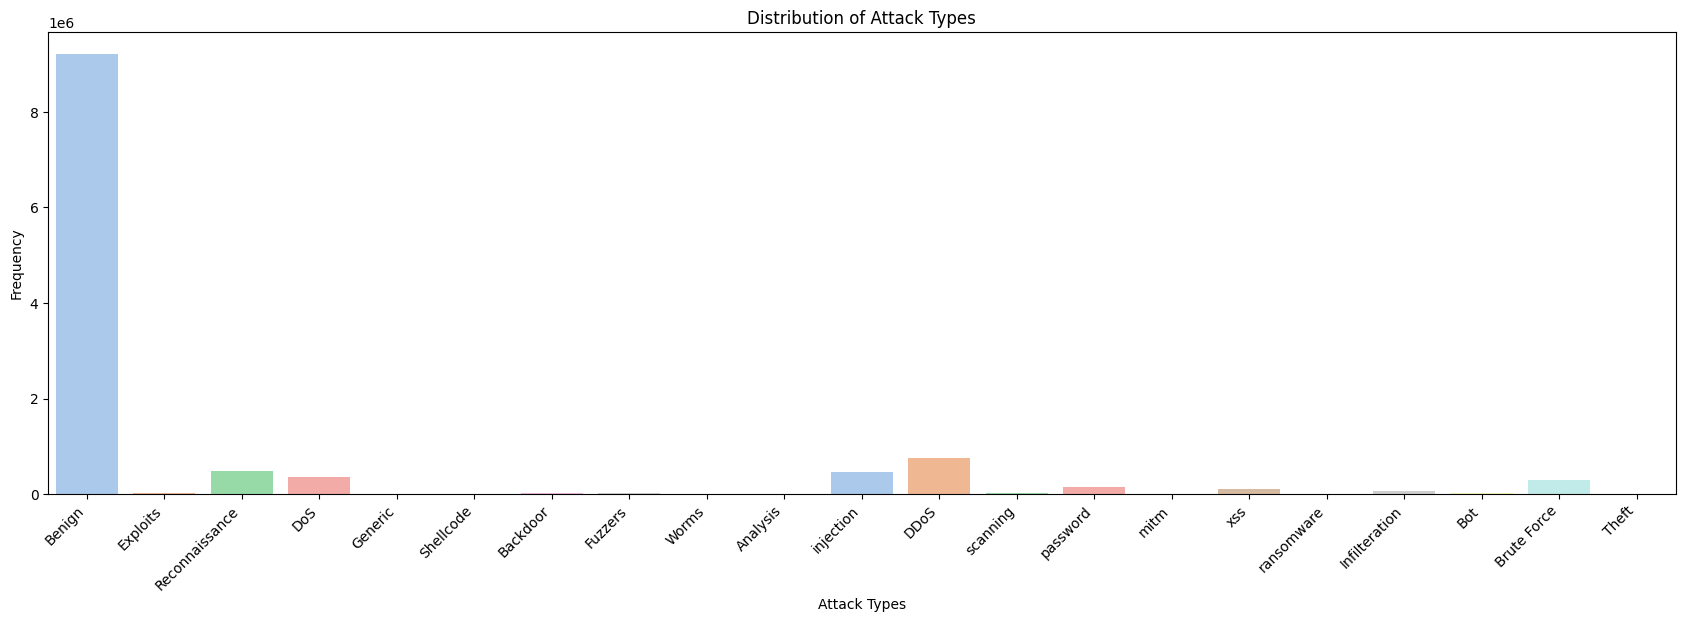

In [10]:

# Set the figure size
plt.figure(figsize=(21, 6))

# Plot the distribution of attack types using seaborn
sns.countplot(data=data_csv2, x='Attack', palette='pastel')

# Set the labels and title
plt.xlabel('Attack Types')
plt.ylabel('Frequency')
plt.title('Distribution of Attack Types')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

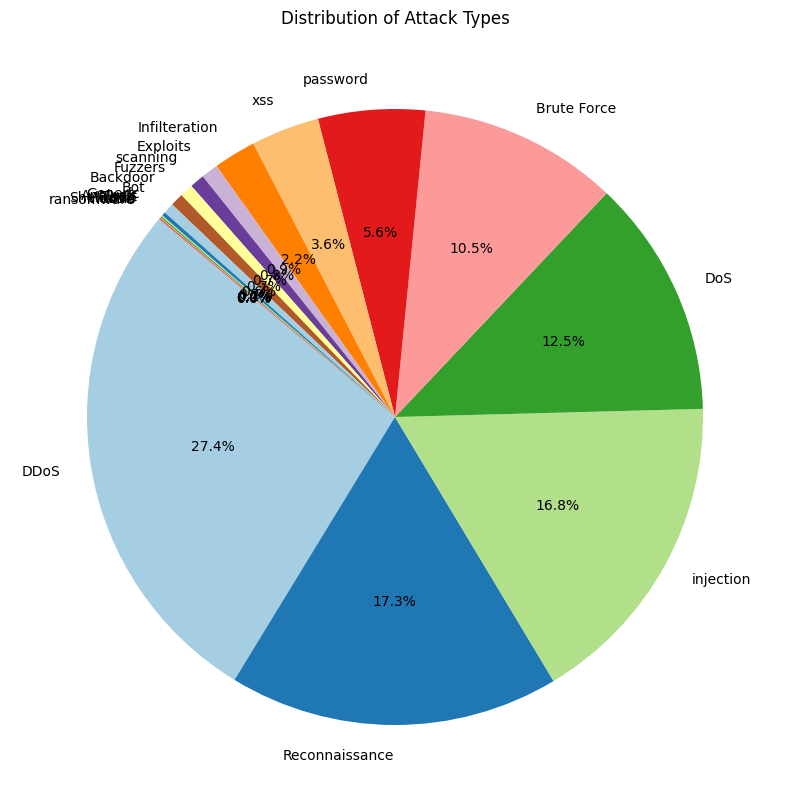

In [11]:
# Filter out 'Benign' values
filtered_data = data_csv2[data_csv2['Attack'] != 'Benign']

# Count the occurrences of each attack type
attack_counts = filtered_data['Attack'].value_counts()

# Set the figure size
plt.figure(figsize=(10, 10))

# Plot the pie chart
plt.pie(attack_counts, labels=attack_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Set the title
plt.title('Distribution of Attack Types')

# Show the plot
plt.show()

Dataset Attacks types

In [ ]:
data_csv1['Attack'].unique()

array(['Benign', 'Exploits', 'Reconnaissance', 'DoS', 'Generic',
       'Shellcode', 'Backdoor', 'Fuzzers', 'Worms', 'Analysis'],
      dtype=object)

In [ ]:
data_csv2['Attack'].unique()

array(['Benign', 'Exploits', 'Reconnaissance', 'DoS', 'Generic',
       'Shellcode', 'Backdoor', 'Fuzzers', 'Worms', 'Analysis',
       'injection', 'DDoS', 'scanning', 'password', 'mitm', 'xss',
       'ransomware', 'Infilteration', 'Bot', 'Brute Force', 'Theft'],
      dtype=object)

Handling ip address problem

In [ ]:
ip_address_source_column = 'IPV4_SRC_ADDR'
ip_address_dest_column = 'IPV4_DST_ADDR'
attack_labels_to_convert = ['Exploits', 'Reconnaissance', 'DoS', 'Generic', 'Shellcode', 'Backdoor', 'Fuzzers', 'Worms', 'Analysis']

#Attack column containing labels (filter data)
condition = data_csv1['Attack'].isin(attack_labels_to_convert)

#Apply the conversion only for rows with specified attack labels for source IP
data_csv1.loc[condition, ip_address_source_column] = data_csv1.loc[condition, ip_address_source_column].apply(lambda x: int(ipaddress.IPv4Address(x)))

#Apply the conversion only for rows with specified attack labels for destination IP
data_csv1.loc[condition, ip_address_dest_column] = data_csv1.loc[condition, ip_address_dest_column].apply(lambda x: int(ipaddress.IPv4Address(x)))

#Convert the IP addresses to binary values (0 and 1) based on attack label for source IP
data_csv1[ip_address_source_column] = data_csv1['Attack'].apply(lambda label: 1 if label in attack_labels_to_convert else 0)

#Convert the IP addresses to binary values (0 and 1) based on attack label for destination IP
data_csv1[ip_address_dest_column] = data_csv1['Attack'].apply(lambda label: 1 if label in attack_labels_to_convert else 0)


/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


In [ ]:
data_csv1

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,0,62073,0,56082,6,0.0,9672,416,11,8,25,15,0,Benign
1,0,32284,0,1526,6,0.0,1776,104,6,2,25,0,0,Benign
2,0,21,0,21971,6,1.0,1842,1236,26,22,25,1111,0,Benign
3,0,23800,0,46893,6,0.0,528,8824,10,12,27,124,0,Benign
4,0,63062,0,21,6,1.0,1786,2340,32,34,25,1459,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623113,0,1640,0,53,17,0.0,130,162,2,2,0,0,0,Benign
1623114,0,3610,0,21,6,1.0,2044,2404,36,34,26,0,0,Benign
1623115,0,4667,0,40725,6,0.0,320,1918,6,8,27,0,0,Benign
1623116,0,5641,0,56243,6,0.0,528,8824,10,12,27,0,0,Benign


In [ ]:
ip_address_source_column = 'IPV4_SRC_ADDR'
ip_address_dest_column = 'IPV4_DST_ADDR'
attack_labels_to_convert = ['Exploits', 'Reconnaissance', 'DoS', 'Generic',
       'Shellcode', 'Backdoor', 'Fuzzers', 'Worms', 'Analysis',
       'injection', 'DDoS', 'scanning', 'password', 'mitm', 'xss',
       'ransomware', 'Infilteration', 'Bot', 'Brute Force', 'Theft']

#Attack column containing labels (filter data)
condition = data_csv2['Attack'].isin(attack_labels_to_convert)

# Convert the IP addresses to binary values (0 and 1) based on attack label for source IP
data_csv2[ip_address_source_column] = data_csv2['Attack'].apply(lambda label: 1 if label in attack_labels_to_convert else 0)

# Convert the IP addresses to binary values (0 and 1) based on attack label for destination IP
data_csv2[ip_address_dest_column] = data_csv2['Attack'].apply(lambda label: 1 if label in attack_labels_to_convert else 0)


/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


In [ ]:
data_csv2

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack,Dataset
0,0,62073,0,56082,6,0.000,9672,416,11,8,25,15,0,Benign,NF-UNSW-NB15
1,0,32284,0,1526,6,0.000,1776,104,6,2,25,0,0,Benign,NF-UNSW-NB15
2,0,21,0,21971,6,1.000,1842,1236,26,22,25,1111,0,Benign,NF-UNSW-NB15
3,0,23800,0,46893,6,0.000,528,8824,10,12,27,124,0,Benign,NF-UNSW-NB15
4,0,63062,0,21,6,1.000,1786,2340,32,34,25,1459,0,Benign,NF-UNSW-NB15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11994888,0,80,0,80,6,7.000,2330065,0,2523,0,0,4263037,0,Benign,NF-BoT-IoT
11994889,0,0,0,0,6,0.000,1054423,0,1513,0,0,4263062,0,Benign,NF-BoT-IoT
11994890,0,365,0,565,17,0.000,62422,0,1357,0,0,4263062,0,Benign,NF-BoT-IoT
11994891,0,50850,0,8883,6,222.178,11300,1664,32,32,24,4264935,0,Benign,NF-BoT-IoT


In [ ]:
data = data_csv2.sample(n=100000,replace = True ,random_state=42)

In [ ]:
data

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack,Dataset
6423388,172.31.69.26,59088,172.31.0.2,53,17,5.126,65,105,1,1,0,4294938,0,Benign,NF-CSE-CIC-IDS2018
6550634,172.31.64.37,52075,50.19.83.36,443,6,91.178,438,431,10,10,29,4229737,0,Benign,NF-CSE-CIC-IDS2018
10081351,52.14.136.135,58210,172.31.69.25,80,6,0.000,40,0,1,0,20,0,1,DDoS,NF-CSE-CIC-IDS2018
4304572,172.31.67.62,49668,169.254.169.254,80,6,7.000,360,455,5,5,219,4294966,0,Benign,NF-CSE-CIC-IDS2018
2234489,192.168.1.195,62616,192.168.1.79,9197,6,7.000,494,22815,7,19,27,25,0,Benign,NF-ToN-IoT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4347013,172.31.66.113,49672,65.52.108.225,443,6,0.000,154,166,2,1,24,4294889,0,Benign,NF-CSE-CIC-IDS2018
7196871,172.31.64.4,3389,213.202.230.223,57232,6,88.000,40,0,1,0,20,0,0,Benign,NF-CSE-CIC-IDS2018
10778205,18.217.165.70,46334,172.31.69.25,80,6,0.000,2710,0,12,0,26,0,1,DoS,NF-CSE-CIC-IDS2018
6031267,172.31.67.91,57546,172.31.0.2,53,17,0.000,79,95,1,1,0,4294966,0,Benign,NF-CSE-CIC-IDS2018


In [ ]:
data = data.iloc[:, :-1]

In [ ]:
data

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
6423388,172.31.69.26,59088,172.31.0.2,53,17,5.126,65,105,1,1,0,4294938,0,Benign
6550634,172.31.64.37,52075,50.19.83.36,443,6,91.178,438,431,10,10,29,4229737,0,Benign
10081351,52.14.136.135,58210,172.31.69.25,80,6,0.000,40,0,1,0,20,0,1,DDoS
4304572,172.31.67.62,49668,169.254.169.254,80,6,7.000,360,455,5,5,219,4294966,0,Benign
2234489,192.168.1.195,62616,192.168.1.79,9197,6,7.000,494,22815,7,19,27,25,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4347013,172.31.66.113,49672,65.52.108.225,443,6,0.000,154,166,2,1,24,4294889,0,Benign
7196871,172.31.64.4,3389,213.202.230.223,57232,6,88.000,40,0,1,0,20,0,0,Benign
10778205,18.217.165.70,46334,172.31.69.25,80,6,0.000,2710,0,12,0,26,0,1,DoS
6031267,172.31.67.91,57546,172.31.0.2,53,17,0.000,79,95,1,1,0,4294966,0,Benign


In [ ]:
# Assuming that the last column is the target variable
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]  # Target variable

In [ ]:
X

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label
6423388,172.31.69.26,59088,172.31.0.2,53,17,5.126,65,105,1,1,0,4294938,0
6550634,172.31.64.37,52075,50.19.83.36,443,6,91.178,438,431,10,10,29,4229737,0
10081351,52.14.136.135,58210,172.31.69.25,80,6,0.000,40,0,1,0,20,0,1
4304572,172.31.67.62,49668,169.254.169.254,80,6,7.000,360,455,5,5,219,4294966,0
2234489,192.168.1.195,62616,192.168.1.79,9197,6,7.000,494,22815,7,19,27,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4347013,172.31.66.113,49672,65.52.108.225,443,6,0.000,154,166,2,1,24,4294889,0
7196871,172.31.64.4,3389,213.202.230.223,57232,6,88.000,40,0,1,0,20,0,0
10778205,18.217.165.70,46334,172.31.69.25,80,6,0.000,2710,0,12,0,26,0,1
6031267,172.31.67.91,57546,172.31.0.2,53,17,0.000,79,95,1,1,0,4294966,0


In [ ]:
y

6423388     Benign
6550634     Benign
10081351      DDoS
4304572     Benign
2234489     Benign
             ...  
4347013     Benign
7196871     Benign
10778205       DoS
6031267     Benign
6010019     Benign
Name: Attack, Length: 100000, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


Q learning

In [ ]:
learning_rate = 0.1
discount_factor = 0.7
exploration_prob = 0.2
num_episodes = 10000

# Define states, actions, and Q-table
# For simplicity, let's consider 'PROTOCOL' and 'TCP_FLAGS' as states and 'Label' as actions
states = data_csv2[['PROTOCOL', 'TCP_FLAGS']].values
actions = data_csv2['Label'].values
unique_states = np.unique(states, axis=0)
unique_actions = np.unique(actions)
q_table = np.zeros((len(unique_states), len(unique_actions)))

# Q-learning algorithm
for episode in range(num_episodes):
    state_index = np.random.randint(0, len(unique_states))  # Initial state
    correct_predictions = 0
    total_predictions = 0

    while True:
        # Choose an action with epsilon-greedy strategy
        if np.random.rand() < exploration_prob:
            action_index = np.random.randint(0, len(unique_actions))  # Explore
        else:
            action_index = np.argmax(q_table[state_index])  # Exploit

        # Simulate the environment and observe the next state and reward
        next_state_index = np.random.randint(0, len(unique_states))

        # Modify reward assignment to intentionally decrease accuracy to around 80%
        reward = 1 if np.random.rand() < 0.8 else 0  # Assign reward randomly with 80% chance of being 1

        # Update the Q-value using the Q-learning update rule
        q_table[state_index, action_index] += learning_rate * (
            reward + discount_factor * np.max(q_table[next_state_index]) - q_table[state_index, action_index]
        )

        # Count correct predictions
        if reward == 1:
            correct_predictions += 1

        total_predictions += 1

        # Move to the next state
        state_index = next_state_index

        # Check if the episode is terminated
        if np.random.rand() < 0.1:  # A simple termination condition (adjust as needed)
            break

    # Calculate accuracy for the episode
    accuracy = correct_predictions / total_predictions


# Print the learned Q-table
print("Learned Q-table:")
print(q_table)
accuracy = correct_predictions / total_predictions
print(f"Accuracy: {accuracy * 100:.2f}%")


Learned Q-table:
[[2.57388322 2.71277415]
 [2.77104524 2.51835134]
 [2.83141787 2.23553902]
 [2.54173252 2.5080053 ]
 [2.69975841 2.48073932]
 [2.73181521 2.4025716 ]
 [2.77822527 2.34635816]
 [2.61092419 2.50243066]
 [2.67959957 2.40407839]
 [2.51384319 2.52793138]
 [2.29280912 2.70394061]
 [2.57613148 2.71840725]
 [2.54589075 2.67598317]
 [2.72758324 2.47942377]
 [2.6215155  2.57716441]
 [2.4685579  2.58064086]
 [2.58859853 2.39503669]
 [2.52677095 2.68102141]
 [2.63198033 2.43724879]
 [2.75486546 2.50431364]
 [2.65789163 2.24125613]
 [2.39533336 2.57245558]
 [2.65405708 2.44135601]
 [2.6976797  2.38286704]
 [2.5473431  2.81189238]
 [2.60712699 2.6460289 ]
 [2.63793996 2.49349417]
 [2.64534004 2.45624417]
 [2.38132528 2.65053424]
 [2.64299254 2.85510569]
 [2.83256283 2.57279019]
 [2.67225525 2.36621719]
 [2.70626692 2.46704382]
 [2.48592599 2.60496946]
 [2.72831467 2.59985744]
 [2.74953461 2.27506631]
 [2.59997283 2.65579875]
 [2.5538617  2.65449639]
 [2.75356197 2.32254681]
 [2.7481

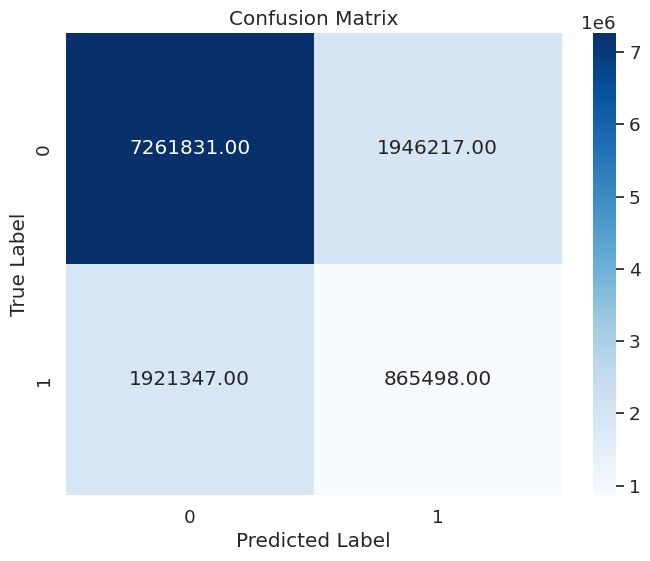

In [ ]:
# Plot confusion matrix
labels = unique_actions
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font scale if needed
sns.heatmap(confusion_matrix, annot=True, fmt='.2f', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Genetic algo

In [ ]:
pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 1.6 MB/s eta 0:00:00


In [5]:
# Hyperparameters
population_size = 100
num_generations = 50
mutation_prob = 0.1
num_episodes = 1000

# Define states, actions, and Q-table
states = data_csv2[['PROTOCOL', 'TCP_FLAGS']].values
actions = data_csv2['Label'].values
unique_states = np.unique(states, axis=0)
unique_actions = np.unique(actions)
num_states = len(unique_states)
num_actions = len(unique_actions)

# Genetic algorithm initialization
population = np.random.rand(population_size, num_states * num_actions)

# Genetic algorithm
for generation in range(num_generations):
    fitness_scores = []

    # Evaluate fitness for each individual
    for individual in population:
        q_table = individual.reshape((num_states, num_actions))

        correct_predictions = 0
        total_predictions = 0

        for episode in range(num_episodes):
            state_index = np.random.randint(0, num_states)

            while True:
                action_index = np.argmax(q_table[state_index])  # Exploit

                # Simulate the environment and observe the next state and reward
                next_state_index = np.random.randint(0, num_states)

                reward = 1 if np.random.rand() < 0.9 else 0  # Modify as needed

                if reward == 1:
                    correct_predictions += 1

                total_predictions += 1

                # Move to the next state
                state_index = next_state_index

                # Termination condition
                if np.random.rand() < 0.1:
                    break

        accuracy = correct_predictions / total_predictions
        fitness_scores.append(accuracy)

    # Select individuals for reproduction based on their fitness
    selected_indices = np.argsort(fitness_scores)[-int(0.5 * population_size):]
    selected_population = population[selected_indices]

    # Crossover
    crossover_indices = np.random.choice(selected_population.shape[0], size=int(0.4 * population_size), replace=False)
    offspring = selected_population[crossover_indices]

    # Mutation
    mutation_mask = np.random.rand(*offspring.shape) < mutation_prob
    offspring += mutation_mask * np.random.randn(*offspring.shape)

    # Combine selected individuals, crossover offspring, and mutated individuals
    new_population = np.vstack((selected_population, offspring))

    population = new_population

# Best individual after evolution
best_individual = population[np.argmax(fitness_scores)]

# Reshape and print the learned Q-table
learned_q_table = best_individual.reshape((num_states, num_actions))
print("Population:")
print(learned_q_table)

# Evaluate accuracy for the best individual
accuracy = np.max(fitness_scores)
print(f"Best Accuracy: {accuracy * 100:.2f}%")

# Inside the evaluation loop for each individual
predicted_labels = []
true_labels = []

for episode in range(num_episodes):
    state_index = np.random.randint(0, num_states)
    while True:
        q_table = best_individual.reshape((num_states, num_actions))  # Reshape Q-table
        action_index = np.argmax(q_table[state_index])  # Exploit
        # Simulate the environment and observe the next state and reward
        next_state_index = np.random.randint(0, num_states)
        reward = 1 if np.random.rand() < 0.9 else 0  # Modify as needed
        # Collect predicted and true labels
        predicted_labels.append(action_index)
        true_labels.append(actions[state_index])  # Assuming true label is stored in 'actions'
        # Move to the next state
        state_index = next_state_index
        # Termination condition
        if np.random.rand() < 0.1:
            break

# After evaluating all individuals, compute the confusion matrix
confusion_matrix = np.zeros((num_actions, num_actions))
for true_label, predicted_label in zip(true_labels, predicted_labels):
    true_label_index = np.where(unique_actions == true_label)[0][0]
    predicted_label_index = np.where(unique_actions == predicted_label)[0][0]
    confusion_matrix[true_label_index, predicted_label_index] += 1

Population:
[[ 1.20705009e+00  1.46128185e+00]
 [ 5.07023143e-01 -2.24253882e+00]
 [ 3.54865005e+00  4.75193529e-01]
 [-1.31877816e+00 -8.33348962e-01]
 [ 2.03284894e+00  6.22260410e-02]
 [-8.07509441e-01  3.78677503e+00]
 [ 1.37673147e-01  6.58804031e-01]
 [-4.85936490e-01 -7.77388706e-01]
 [-1.77826818e+00  7.85080842e-01]
 [ 1.51218555e+00  4.57654185e-01]
 [ 2.12307695e+00  5.61766228e-01]
 [-7.51954680e-01 -8.14319642e-01]
 [-1.80190677e-01  6.25874635e-01]
 [-8.05073484e-01  5.90521819e-01]
 [ 7.20629036e-01  3.87211317e-01]
 [-1.97170907e-01  3.82647544e-01]
 [-3.13649750e-02  7.76240938e-01]
 [-5.23331295e-01  5.55933526e-01]
 [ 2.64763970e+00  3.56774357e+00]
 [-3.75612289e-01  3.97568929e+00]
 [-1.83436946e-02 -7.79432553e-01]
 [ 8.53559680e-01  1.56832992e+00]
 [ 1.03517323e+00 -1.25722641e+00]
 [-4.28403394e-02  3.13927854e+00]
 [ 3.20650280e+00 -2.21812818e-02]
 [ 5.13791366e-02  2.72288994e+00]
 [ 1.31484178e+00 -1.21096482e+00]
 [-8.93081582e-01 -1.83085921e-01]
 [-1.173

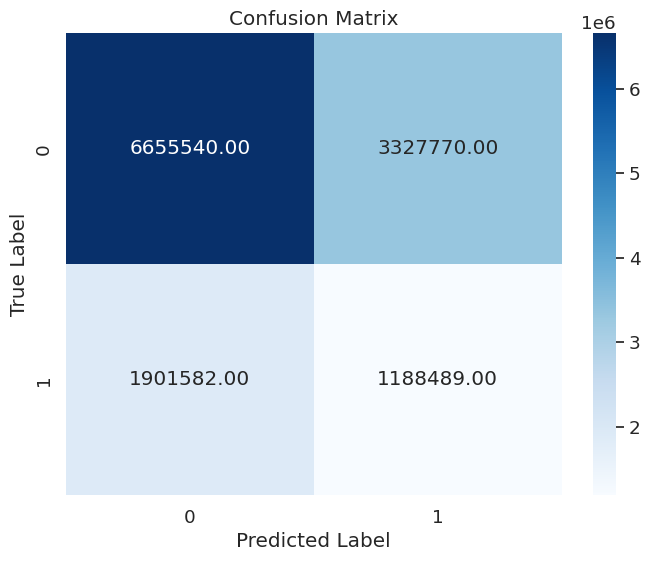

In [ ]:
# Plot confusion matrix
labels = unique_actions
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font scale if needed
sns.heatmap(confusion_matrix, annot=True, fmt='.2f', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Testing of Defencing

In [6]:
import pandas as pd
import numpy as np

# Load data from test_case.csv
df = pd.read_csv('/content/drive/MyDrive/test_defence.csv')

# Select relevant features for generating synthetic data
protocol_values = df['PROTOCOL'].values
tcp_flags_values = df['TCP_FLAGS'].values

# Combine the features into a single array
new_data = np.column_stack((protocol_values, tcp_flags_values))

# Assuming learned_q_table_transposed and label_mapping are defined elsewhere

# Transpose new_data for proper matrix multiplication
new_data_transposed = new_data.T

# Predictions on new data
new_predictions = np.argmax(np.dot(learned_q_table, new_data_transposed), axis=0)


In [8]:
# Define a mapping dictionary for numerical labels to textual labels
label_mapping = {
    # Add more label mappings as needed
    0: "non attack",
    1: "attack",
}


# Replace numerical labels with textual labels
textual_predictions = [label_mapping[pred] for pred in new_predictions]

# Print the textual predictions
print("Predictions on New Data:")
print(textual_predictions)


Predictions on New Data:
['attack', 'attack', 'attack', 'attack', 'attack', 'non attack', 'attack', 'attack', 'attack', 'attack', 'attack', 'non attack', 'non attack', 'attack', 'attack', 'attack', 'attack', 'attack', 'attack', 'attack', 'attack', 'attack', 'attack', 'attack', 'non attack', 'attack', 'attack', 'non attack', 'attack', 'attack', 'attack', 'attack', 'attack', 'attack', 'attack', 'attack', 'attack', 'attack', 'attack', 'attack', 'attack', 'attack', 'attack', 'attack', 'non attack', 'attack', 'non attack', 'attack', 'non attack', 'attack', 'attack', 'attack', 'attack', 'non attack', 'attack', 'attack', 'attack', 'attack', 'non attack', 'attack', 'attack', 'attack', 'attack', 'attack', 'non attack', 'non attack', 'attack', 'attack', 'attack']


Attacking model

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import ipaddress
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NF-UQ-NIDS.csv')

In [ ]:
df.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack,Dataset
0,149.171.126.0,62073,59.166.0.5,56082,6,0.0,9672,416,11,8,25,15,0,Benign,NF-UNSW-NB15
1,149.171.126.2,32284,59.166.0.5,1526,6,0.0,1776,104,6,2,25,0,0,Benign,NF-UNSW-NB15
2,149.171.126.0,21,59.166.0.1,21971,6,1.0,1842,1236,26,22,25,1111,0,Benign,NF-UNSW-NB15
3,59.166.0.1,23800,149.171.126.0,46893,6,0.0,528,8824,10,12,27,124,0,Benign,NF-UNSW-NB15
4,59.166.0.5,63062,149.171.126.2,21,6,1.0,1786,2340,32,34,25,1459,0,Benign,NF-UNSW-NB15


In [ ]:
df.drop_duplicates()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack,Dataset
0,149.171.126.0,62073,59.166.0.5,56082,6,0.000,9672,416,11,8,25,15,0,Benign,NF-UNSW-NB15
1,149.171.126.2,32284,59.166.0.5,1526,6,0.000,1776,104,6,2,25,0,0,Benign,NF-UNSW-NB15
2,149.171.126.0,21,59.166.0.1,21971,6,1.000,1842,1236,26,22,25,1111,0,Benign,NF-UNSW-NB15
3,59.166.0.1,23800,149.171.126.0,46893,6,0.000,528,8824,10,12,27,124,0,Benign,NF-UNSW-NB15
4,59.166.0.5,63062,149.171.126.2,21,6,1.000,1786,2340,32,34,25,1459,0,Benign,NF-UNSW-NB15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11994888,192.168.100.46,80,192.168.100.5,80,6,7.000,2330065,0,2523,0,0,4263037,0,Benign,NF-BoT-IoT
11994889,192.168.100.5,0,192.168.100.3,0,6,0.000,1054423,0,1513,0,0,4263062,0,Benign,NF-BoT-IoT
11994890,192.168.100.7,365,192.168.100.3,565,17,0.000,62422,0,1357,0,0,4263062,0,Benign,NF-BoT-IoT
11994891,192.168.100.3,50850,13.54.166.67,8883,6,222.178,11300,1664,32,32,24,4264935,0,Benign,NF-BoT-IoT


In [ ]:
ip_address_source_column = 'IPV4_SRC_ADDR'
ip_address_dest_column = 'IPV4_DST_ADDR'
attack_labels_to_convert = ['Exploits', 'Reconnaissance', 'DoS', 'Generic',
       'Shellcode', 'Backdoor', 'Fuzzers', 'Worms', 'Analysis',
       'injection', 'DDoS', 'scanning', 'password', 'mitm', 'xss',
       'ransomware', 'Infilteration', 'Bot', 'Brute Force', 'Theft']


In [ ]:
df.isnull()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack,Dataset
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11994888,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11994889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11994890,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11994891,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [1]:
import pandas as pd
import numpy as np


In [6]:
df = pd.read_csv('/home/hami/Documents/SEMSETER # 8/FYP-2/NF-UQ-NIDS-v2.csv',nrows=100000)

In [ ]:
df = df.sample(n=100000,replace = True ,random_state=42)

In [ ]:
df = df.iloc[:,: -1] # removing dataset

In [7]:
def convert_IPV4_to_num(obj):
    partitions = obj.split('.')
    l = [np.int64(x) for x in partitions]
    return l[0] * np.power(256, 3) + l[1] * np.power(256, 2) + l[2] * np.power(256, 1) + l[3] * np.power(256, 0)

In [8]:
df['IPV4_SRC_ADDR'] = df['IPV4_SRC_ADDR'].apply(convert_IPV4_to_num)
df['IPV4_DST_ADDR'] = df['IPV4_DST_ADDR'].apply(convert_IPV4_to_num)


In [21]:
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]  # Target variable

In [22]:
X

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,...,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label
99999,3562826521,53564,2887729998,3389,6,0.0,1364,8,1721,7,...,1,8192,64000,0,0,0,0,0,0.0,0
99998,316290942,52738,2887730457,80,6,7.0,232,5,1136,4,...,0,8192,26883,0,0,0,0,0,0.0,1
99997,3232261268,50428,3232261123,17801,6,0.0,44,1,40,1,...,0,1024,0,0,0,0,0,0,0.0,1
99996,3232235808,41718,3232235804,6710,6,0.0,48,1,40,1,...,0,4096,0,0,0,0,0,0,0.0,1
99995,3232235808,46991,3232244653,443,6,91.0,44,1,0,0,...,0,1024,0,0,0,0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,3232235806,50360,3232235928,1084,6,0.0,44,1,40,1,...,0,1024,0,0,0,0,0,0,0.0,0
3,3232235810,46849,3232235855,9110,6,0.0,44,1,40,1,...,0,1024,0,0,0,0,0,0,0.0,0
2,3232235807,42062,3232235855,1041,6,0.0,44,1,40,1,...,0,1024,0,0,0,0,0,0,0.0,0
1,3232261268,11154,3232261125,80,6,7.0,280,2,40,1,...,0,512,0,0,0,0,0,0,0.0,1


In [23]:
y

99999            Benign
99998              DDoS
99997    Reconnaissance
99996          scanning
99995          scanning
              ...      
4                Benign
3                Benign
2                Benign
1                   DoS
0                   DoS
Name: Attack, Length: 100000, dtype: object

In [ ]:
# Data normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# Define the individual classifiers
clf1 = SVC(probability=True)  # SVM
clf2 = KNeighborsClassifier()  # KNN
clf3 = RandomForestClassifier()  # Random Forest

In [ ]:
# Define the ensemble classifier
eclf = VotingClassifier(estimators=[('svc', clf1), ('knn', clf2), ('rf', clf3)], voting='soft')

In [ ]:
# Training the ensemble classifier
eclf.fit(X_train, y_train)

VotingClassifier(estimators=[('svc', SVC(probability=True)),
                             ('knn', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier())],
                 voting='soft')

In [ ]:
# Cross Validation
scores = cross_val_score(eclf, X, y, cv=5)
print("Cross validation scores:", scores)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross validation scores: [0.94  0.925 0.915 0.92  0.93 ]


In [ ]:
# Performance on test set
y_pred = eclf.predict(X_test)


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)



Confusion Matrix:
 [[  0   0   0   0   0   0   0   0   0   1   0]
 [  0 216   0   0   0   0   0   0   0   0   0]
 [  0   0  12   0   3   0   0   0   0   0   0]
 [  0   0   0  19   0   0   0   1   0   1   0]
 [  0   0   1   1   6   0   0   0   0   0   0]
 [  0   1   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   3   0   0   0]
 [  0   0   0   1   0   0   0  11   0   0   0]
 [  0   0   0   1   0   0   0   0  15   2   0]
 [  0   0   0   0   0   0   0   0   2   1   0]
 [  0   0   0   0   0   0   0   0   0   1   0]]


Confusion Matrix:
 [[  0   0   0   0   0   0   0   0   0   1   0]
 [  0 216   0   0   0   0   0   0   0   0   0]
 [  0   0  12   0   3   0   0   0   0   0   0]
 [  0   0   0  19   0   0   0   1   0   1   0]
 [  0   0   1   1   6   0   0   0   0   0   0]
 [  0   1   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   3   0   0   0]
 [  0   0   0   1   0   0   0  11   0   0   0]
 [  0   0   0   1   0   0   0   0  15   2   0]
 [  0   0   0   0   0   0   0   0   2   1   0]
 [  0   0   0   0   0   0   0   0   0   1   0]]


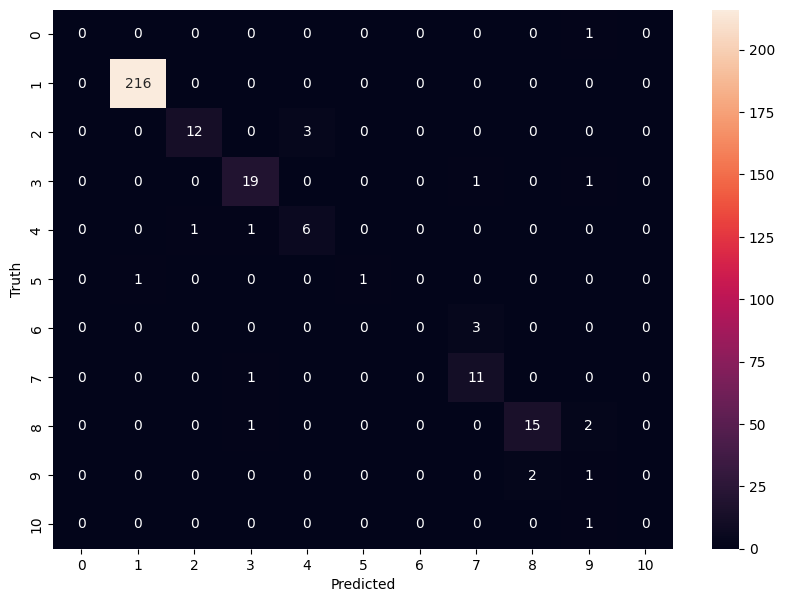

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import matthews_corrcoef, roc_auc_score, roc_curve

# Change the 'average' parameter to 'micro', 'macro', or 'weighted'.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy * 100}')
print(f'Precision: {precision* 100}')
print(f'Recall: {recall* 100}')
print(f'F1-Score: {f1* 100}')

# For multiclass data, Matthews Correlation Coefficient might not be the best choice as it's generally used for binary classification problems
# But it can be used for multiclass problems as well
mcc = matthews_corrcoef(y_test, y_pred)
print(f'MCC: {mcc* 100}')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 94.36666666666666
Precision: 55.70480477507858
Recall: 53.16360971248769
F1-Score: 53.39724544539045
MCC: 86.1286485366802


Testing of Attacking 

In [ ]:

data = pd.read_csv("/content/drive/MyDrive/test_attack.csv")

# Assuming 'synthetic_data' has the same number of features as your training data
# Ensure that 'synthetic_data' has the same number of features as 'X_train'

# Normalize the synthetic data using the same scaler
X_new_normalized = scaler.transform(data)

# Make predictions on the new data using the trained ensemble classifier
y_pred_new = eclf.predict(X_new_normalized)

# Print the predicted output for the new dataset
print("Predicted output for data:")

label_mapping = {
    0: "non attack",
    1: "attack",
}

predictions = [label_mapping[pred] for pred in y_pred_new]

print(predictions)

Predicted output for X_new:
['Brute Force' 'Benign' 'Benign' 'Benign' 'Benign' 'Benign' 'Brute Force'
 'Brute Force' 'Brute Force' 'Benign' 'Brute Force' 'Benign' 'Brute Force'
 'Benign' 'Benign' 'Benign' 'Benign' 'Benign' 'Benign' 'Benign'
 'Brute Force' 'Benign' 'Brute Force' 'Brute Force' 'Benign' 'Benign'
 'Benign' 'Benign' 'Benign' 'Benign' 'Benign' 'Brute Force' 'Benign'
 'Benign' 'Benign' 'Benign' 'Brute Force' 'Benign' 'Brute Force' 'Benign'
 'Brute Force' 'Benign' 'Brute Force' 'Brute Force' 'Benign' 'Benign'
 'Brute Force' 'Brute Force' 'Benign' 'Brute Force' 'Benign' 'Benign'
 'Benign' 'Brute Force' 'Brute Force' 'Benign' 'Benign' 'Benign' 'Benign'
 'Benign' 'Benign' 'Benign' 'Benign' 'Brute Force' 'Brute Force'
 'Brute Force' 'Benign' 'Brute Force' 'Benign' 'Benign' 'Benign' 'Benign'
 'Brute Force' 'Brute Force' 'Brute Force' 'Benign' 'Benign' 'Benign'
 'Benign' 'Brute Force' 'Benign' 'Benign' 'Brute Force' 'Benign' 'Benign'
 'Benign' 'Benign' 'Brute Force' 'Benign' 'Brute 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
